In [3]:
import tweepy 
import pandas as pd 
import numpy as np
from IPython.display import display
import re

In [4]:
   data = pd.read_csv('Costatwt.csv')

In [5]:
data.head()

,Tweets
0,@chrisdysonHT @SafeSENCOSaeed @BrightLeadChris...
1,#Costa use my link to treat us both xx\n\nUse ...
2,RT @SafarTwins: مع هشام باشا مبسوط أوي @ahyani...
3,RT @MaximMag: The breathtaking seaside escape ...
4,RT @MaximMag: The breathtaking seaside escape ...


In [6]:
len(data)

1049

In [7]:
data.columns

Index(['Tweets'], dtype='object')

In [8]:
data.count()

Tweets    1049
dtype: int64

In [9]:
data.dtypes

Tweets    object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1049 non-null   object
dtypes: object(1)
memory usage: 8.3+ KB


In [11]:
display(sum(data.duplicated()))

151

In [12]:
#find dublicated row with the same value in 'Tweets'
display(data[data.duplicated(subset='Tweets')].head())

,Tweets
4,RT @MaximMag: The breathtaking seaside escape ...
6,RT @MaximMag: The breathtaking seaside escape ...
7,RT @MaximMag: The breathtaking seaside escape ...
9,RT @MaximMag: The breathtaking seaside escape ...
10,RT @MaximMag: The breathtaking seaside escape ...


In [13]:
data=data[data['Tweets'].str.contains('RT')==False]

display(data[data['Tweets'].str.contains('RT')])

,Tweets


In [14]:
display(sum(data.duplicated()))

10

In [15]:
data.drop_duplicates(subset='Tweets',inplace=True)

In [16]:
display(sum(data.duplicated()))

0

In [17]:
def cleantwt1 (twt):

  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  return twt

In [18]:
data['CleanedTweets'] = data['Tweets'].apply(cleantwt1)

In [19]:
data.head()

,Tweets,CleanedTweets
0,@chrisdysonHT @SafeSENCOSaeed @BrightLeadChris...,We should launch a kindness c...
1,#Costa use my link to treat us both xx\n\nUse ...,use my link to treat us both xx\n\nUse the Co...
5,After the release of a new video of costa coff...,After the release of a new video of costa coff...
8,مع هشام باشا مبسوط أوي @ahyani99 😍😍 (@ Costa C...,مع هشام باشا مبسوط أوي 😍😍 ( Costa Coffee | Dr...
36,@ChronicleLive Never use Costa or any of the o...,Never use Costa or any of the other coffee sh...


In [20]:
def remove_Emojis(twt):
    twt = re.sub('[/\W+/g]',' ', twt)
    return twt

In [21]:
data['remove_Emojis'] = data['CleanedTweets'].apply(remove_Emojis)

In [22]:
data.head()

,Tweets,CleanedTweets,remove_Emojis
0,@chrisdysonHT @SafeSENCOSaeed @BrightLeadChris...,We should launch a kindness c...,We should launch a kindness c...
1,#Costa use my link to treat us both xx\n\nUse ...,use my link to treat us both xx\n\nUse the Co...,use my link to treat us both xx Use the Cost...
5,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...
8,مع هشام باشا مبسوط أوي @ahyani99 😍😍 (@ Costa C...,مع هشام باشا مبسوط أوي 😍😍 ( Costa Coffee | Dr...,مع هشام باشا مبسوط أوي Costa Coffee Dr...
36,@ChronicleLive Never use Costa or any of the o...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...


In [23]:
#issue 4 remove non-english world
# Define a regular expression pattern to match English letters
english_pattern = re.compile('[a-z A-Z]+')


In [24]:
# Define a function to remove non-English letters from a string
def remove_non_english_letters(text):
    return ''.join([char for char in text if english_pattern.match(char)])

In [25]:
# Apply the function to all elements in the DataFrame
data['remove_nonEnglish'] = data['remove_Emojis'].apply(remove_non_english_letters)

In [26]:
data.head()

,Tweets,CleanedTweets,remove_Emojis,remove_nonEnglish
0,@chrisdysonHT @SafeSENCOSaeed @BrightLeadChris...,We should launch a kindness c...,We should launch a kindness c...,We should launch a kindness c...
1,#Costa use my link to treat us both xx\n\nUse ...,use my link to treat us both xx\n\nUse the Co...,use my link to treat us both xx Use the Cost...,use my link to treat us both xx Use the Cost...
5,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...
8,مع هشام باشا مبسوط أوي @ahyani99 😍😍 (@ Costa C...,مع هشام باشا مبسوط أوي 😍😍 ( Costa Coffee | Dr...,مع هشام باشا مبسوط أوي Costa Coffee Dr...,Costa Coffee Drive Thru in Mecc...
36,@ChronicleLive Never use Costa or any of the o...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...


In [27]:
def remove_unrelated_chars(Tweets):
    Tweets = re.sub('{-}','',Tweets)
    Tweets = re.sub('#([^\s]+)',r'\\u003c\\1',Tweets)
    Tweets = re.sub('@([^\s]+)',r' ',Tweets)
    Tweets = re.sub('\n',' ',Tweets)
    Tweets = re.sub('\t',' ',Tweets)
    Tweets = re.sub('\r',' ',Tweets)
    return Tweets

In [28]:
data['remove_unrelated_chars'] = data['remove_nonEnglish'].apply(remove_unrelated_chars)

In [29]:
data.sample(20)

,Tweets,CleanedTweets,remove_Emojis,remove_nonEnglish,remove_unrelated_chars
268,@benleo444 I had a trans person in my local Co...,I had a trans person in my local Costa Coffee...,I had a trans person in my local Costa Coffee...,I had a trans person in my local Costa Coffee...,I had a trans person in my local Costa Coffee...
493,i will say he’s so real for the costa coffee tho!,i will say he’s so real for the costa coffee tho!,i will say he s so real for the costa coffee tho,i will say he s so real for the costa coffee tho,i will say he s so real for the costa coffee tho
536,Costa coffee ochilarkan https://t.co/l1nUUDqQeP,Costa coffee ochilarkan,Costa coffee ochilarkan,Costa coffee ochilarkan,Costa coffee ochilarkan
1043,@fagin_mr Careful lads we've all had a Costa c...,Careful lads we've all had a Costa coffee.,Careful lads we ve all had a Costa coffee,Careful lads we ve all had a Costa coffee,Careful lads we ve all had a Costa coffee
167,@LolaGanzarolli @MartinDaubney @StarbucksUK St...,Starbucks coffee is awful as is costa and N...,Starbucks coffee is awful as is costa and N...,Starbucks coffee is awful as is costa and N...,Starbucks coffee is awful as is costa and N...
829,@Antman0528 Can I ask why you put this post on...,Can I ask why you put this post on at 6.29? I...,Can I ask why you put this post on at 6 29 I...,Can I ask why you put this post on at Is t...,Can I ask why you put this post on at Is t...
520,The Costa coffee outlet in Bridgend…..card poi...,The Costa coffee outlet in Bridgend…..card poi...,The Costa coffee outlet in Brid end card poi...,The Costa coffee outlet in Brid end card poi...,The Costa coffee outlet in Brid end card poi...
879,"@tina0402x I mean, this is clearly bollocks, t...","I mean, this is clearly bollocks, the lid is ...",I mean this is clearly bollocks the lid is ...,I mean this is clearly bollocks the lid is ...,I mean this is clearly bollocks the lid is ...
510,@Onowine Same on the travel recharge. Pre-COVI...,"Same on the travel recharge. Pre-COVID, I had...",Same on the travel rechar e Pre COVID I had...,Same on the travel rechar e Pre COVID I had...,Same on the travel rechar e Pre COVID I had...
186,Coffee shop ranking :\n\n1. Costa \n2. Nero \n...,Coffee shop ranking :\n\n1. Costa \n2. Nero \n...,Coffee shop rankin 1 Costa 2 Nero 3 S...,Coffee shop rankin Costa Nero Star...,Coffee shop rankin Costa Nero Star...


In [30]:
from nltk.corpus import stopwords

In [31]:
stop_words = stopwords.words('english')

In [32]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data['remove_stopwords'] = data['remove_unrelated_chars'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [34]:
data.sample(10)

,Tweets,CleanedTweets,remove_Emojis,remove_nonEnglish,remove_unrelated_chars,remove_stopwords
464,"don't even go there, i am italian and we did n...","don't even go there, i am italian and we did n...",don t even o there i am italian and we did n...,don t even o there i am italian and we did n...,don t even o there i am italian and we did n...,even italian row starbucks costa place like co...
532,Hey! Costa is giving out 5 extra beans today f...,Hey! Costa is giving out 5 extra beans today f...,Hey Costa is ivin out 5 extra beans today f...,Hey Costa is ivin out extra beans today fo...,Hey Costa is ivin out extra beans today fo...,Hey Costa ivin extra beans today If anyone wan...
125,Starbucks to Costa Coffee: Which has the stron...,Starbucks to Costa Coffee: Which has the stron...,Starbucks to Costa Coffee Which has the stron...,Starbucks to Costa Coffee Which has the stron...,Starbucks to Costa Coffee Which has the stron...,Starbucks Costa Coffee Which stron est caffein...
736,Costa Coffee Bothwell Street is my saviour lot...,Costa Coffee Bothwell Street is my saviour lot...,Costa Coffee Bothwell Street is my saviour lot...,Costa Coffee Bothwell Street is my saviour lot...,Costa Coffee Bothwell Street is my saviour lot...,Costa Coffee Bothwell Street saviour lotsa love u
951,They closed unexpectedly 😳\n\nhttps://t.co/AqC...,They closed unexpectedly 😳\n\n,They closed unexpectedly,They closed unexpectedly,They closed unexpectedly,They closed unexpectedly
55,Hello coffee lovers! Join our ‘Gourmet Costa R...,Hello coffee lovers! Join our ‘Gourmet Costa R...,Hello coffee lovers Join our Gourmet Costa R...,Hello coffee lovers Join our Gourmet Costa R...,Hello coffee lovers Join our Gourmet Costa R...,Hello coffee lovers Join Gourmet Costa Rican C...
423,Everything guys do nowadays is an 'ick'\n- buy...,Everything guys do nowadays is an 'ick'\n- buy...,Everythin uys do nowadays is an ick buys...,Everythin uys do nowadays is an ick buys...,Everythin uys do nowadays is an ick buys...,Everythin uys nowadays ick buys coffee starbuc...
928,"Lovely staff, so helpful and friendly.\nMake a...","Lovely staff, so helpful and friendly.\nMake a...",Lovely staff so helpful and friendly Make a ...,Lovely staff so helpful and friendly Make a ...,Lovely staff so helpful and friendly Make a ...,Lovely staff helpful friendly Make ood coffee ...
750,"There's a Costa Coffee here now too, with a dr...","There's a Costa Coffee here now too, with a dr...",There s a Costa Coffee here now too with a dr...,There s a Costa Coffee here now too with a dr...,There s a Costa Coffee here now too with a dr...,There Costa Coffee drive thru weird town plann...
665,It must be #Friday!\nBring on the #Coffee and ...,It must be !\nBring on the and . \n☕️🧁☕️🍩☕️🍪\...,It must be Brin on the and ...,It must be Brin on the and ...,It must be Brin on the and ...,It must Brin


In [35]:
data['cleanTweets'] = data['remove_stopwords']

In [36]:
data.to_csv("CostatwtClean1.csv", index=False)

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk


In [38]:
#Calculating Negative, Positive, Neutral and Compound values

data[['polarity', 'subjectivity']] = data['remove_stopwords'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in data['remove_stopwords'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        data.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        data.loc[index, 'sentiment'] = "positive"
    else:
        data.loc[index, 'sentiment'] = "neutral"
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp

data.head(20)

,Tweets,CleanedTweets,remove_Emojis,remove_nonEnglish,remove_unrelated_chars,remove_stopwords,cleanTweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@chrisdysonHT @SafeSENCOSaeed @BrightLeadChris...,We should launch a kindness c...,We should launch a kindness c...,We should launch a kindness c...,We should launch a kindness c...,We launch kindness campai n John Ma ee try et ...,We launch kindness campai n John Ma ee try et ...,0.400000,0.800000,positive,0.000,0.690,0.310,0.7430
1,#Costa use my link to treat us both xx\n\nUse ...,use my link to treat us both xx\n\nUse the Co...,use my link to treat us both xx Use the Cost...,use my link to treat us both xx Use the Cost...,use my link to treat us both xx Use the Cost...,use link treat us xx Use Costa app like et bea...,use link treat us xx Use Costa app like et bea...,0.325000,0.566667,positive,0.000,0.691,0.309,0.8176
5,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After the release of a new video of costa coff...,After release new video costa coffee empoyin c...,After release new video costa coffee empoyin c...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
8,مع هشام باشا مبسوط أوي @ahyani99 😍😍 (@ Costa C...,مع هشام باشا مبسوط أوي 😍😍 ( Costa Coffee | Dr...,مع هشام باشا مبسوط أوي Costa Coffee Dr...,Costa Coffee Drive Thru in Mecc...,Costa Coffee Drive Thru in Mecc...,Costa Coffee Drive Thru Mecca,Costa Coffee Drive Thru Mecca,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
36,@ChronicleLive Never use Costa or any of the o...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...,Never use Costa or any of the other coffee sh...,Never use Costa coffee shop always use local c...,Never use Costa coffee shop always use local c...,0.200000,0.500000,positive,0.000,0.654,0.346,0.6486
38,@brougher1 @bumbleysmum Eh'll need to say it w...,Eh'll need to say it when ordering coffee fr...,Eh ll need to say it when orderin coffee fr...,Eh ll need to say it when orderin coffee fr...,Eh ll need to say it when orderin coffee fr...,Eh need say orderin coffee Costa West coasters...,Eh need say orderin coffee Costa West coasters...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
40,@OliLondonTV COSTA COFFEE for me now -,COSTA COFFEE for me now -,COSTA COFFEE for me now,COSTA COFFEE for me now,COSTA COFFEE for me now,COSTA COFFEE,COSTA COFFEE,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
41,@GeneralTwattery @Asuryan12 @KitGregson @PymPu...,A Costa coffee shop is 'shutting down' in ...,A Costa coffee shop is shuttin down in ...,A Costa coffee shop is shuttin down in ...,A Costa coffee shop is shuttin down in ...,A Costa coffee shop shuttin town woolworths sh...,A Costa coffee shop shuttin town woolworths sh...,-0.400000,0.700000,positive,0.071,0.827,0.102,0.2023
42,customer: what's the costa rican coffee?\nme: ...,customer: what's the costa rican coffee?\nme: ...,customer what s the costa rican coffee me i...,customer what s the costa rican coffee me i...,customer what s the costa rican coffee me i...,customer costa rican coffee know read customer...,customer costa rican coffee know read customer...,-0.400000,0.850000,negative,0.174,0.725,0.101,-0.3612
43,@reprobatepress @anon_opin If people want a co...,If people want a coffee in a pub it should b...,If people want a coffee in a pub it should b...,If people want a coffee in a pub it should b...,If people want a coffee in a pub it should b...,If people want coffee pub Nescafe Instant noth...,If people want coffee pub Nescafe Instant noth...,0.000000,0.666667,positive,0.000,0.874,0.126,0.0772


In [39]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [40]:
#Count_values for sentiment
count_values_in_column(data,"sentiment")

,Total,Percentage
sentiment,,
positive,350,43.91
neutral,320,40.15
negative,127,15.93


In [41]:
data.to_csv("CostatwtClean1.csv", index=False)

In [42]:
data2 = data[['cleanTweets','sentiment','neg','neu','pos']]

In [43]:
data2.to_csv("CostatwtClean2.csv", index=False)

In [44]:
data2.shape

(797, 5)

In [45]:
data2.columns

Index(['cleanTweets', 'sentiment', 'neg', 'neu', 'pos'], dtype='object')

In [46]:
data2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cleanTweets  797 non-null    object 
 1   sentiment    797 non-null    object 
 2   neg          797 non-null    float64
 3   neu          797 non-null    float64
 4   pos          797 non-null    float64
dtypes: float64(3), object(2)
memory usage: 69.6+ KB


In [47]:
data2.describe()

,neg,neu,pos
count,797.000000,797.000000,797.000000
mean,0.050105,0.815262,0.125842
std,0.113575,0.196446,0.159201
min,0.000000,0.000000,0.000000
25%,0.000000,0.688000,0.000000
50%,0.000000,0.850000,0.048000
75%,0.000000,1.000000,0.231000
max,0.649000,1.000000,0.730000


In [48]:
data2.describe(include=['object'])

,cleanTweets,sentiment
count,797,797
unique,696,3
top,COSTA COFFEE,positive
freq,25,350


In [49]:
#importing libraries for word occurrences and count
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#instantiate CountVectorizer()
countVec = CountVectorizer()

# this step generates word counts for the words  
word_count_vector = countVec.fit_transform(data2['cleanTweets'].values.astype('U'))

word_count_vector.shape

(797, 3621)

In [51]:
#transform count matrix to normal tf-idf
tfidf_transform=TfidfTransformer(smooth_idf=True,use_idf=True)
#idf values
tfidf_transform.fit(word_count_vector)

TfidfTransformer()

In [52]:
#print idf values
df_idf=pd.DataFrame(tfidf_transform.idf_,index=countVec.vocabulary_.keys(),columns=['idf_weights'])

In [53]:
df_idf.sort_values(by=['idf_weights']).head(15)

,idf_weights
mostly,1.075458
dari,1.083600
actual,3.312661
vendors,3.364620
selection,3.538974
sis,3.538974
wei,3.656757
installed,3.730865
escape,3.730865
arc,3.750283


In [54]:
df_idf.sort_values(by=['idf_weights']).tail(15)

,idf_weights
data,6.988961
visuals,6.988961
article,6.988961
heart,6.988961
communities,6.988961
central,6.988961
american,6.988961
hotter,6.988961
erratic,6.988961
matchin,6.988961


In [55]:
#dropp the neutral and iirelevant classes
data=data[data['sentiment'] != 'natural']
data=data[data['sentiment'] != 'irrelevant']

In [56]:
#change values to numeric 
data['sentiment'] = data['sentiment'].map({'positive': 0, 'negative':1})
data=data.drop(columns=['Tweets','CleanedTweets','remove_Emojis','remove_nonEnglish','remove_unrelated_chars','remove_stopwords'])
data.head(10)


,cleanTweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,We launch kindness campai n John Ma ee try et ...,0.400000,0.800000,0.0,0.000,0.690,0.310,0.7430
1,use link treat us xx Use Costa app like et bea...,0.325000,0.566667,0.0,0.000,0.691,0.309,0.8176
5,After release new video costa coffee empoyin c...,0.136364,0.454545,NaN,0.000,1.000,0.000,0.0000
8,Costa Coffee Drive Thru Mecca,0.000000,0.000000,NaN,0.000,1.000,0.000,0.0000
36,Never use Costa coffee shop always use local c...,0.200000,0.500000,0.0,0.000,0.654,0.346,0.6486
38,Eh need say orderin coffee Costa West coasters...,0.000000,0.000000,NaN,0.000,1.000,0.000,0.0000
40,COSTA COFFEE,0.000000,0.000000,NaN,0.000,1.000,0.000,0.0000
41,A Costa coffee shop shuttin town woolworths sh...,-0.400000,0.700000,0.0,0.071,0.827,0.102,0.2023
42,customer costa rican coffee know read customer...,-0.400000,0.850000,1.0,0.174,0.725,0.101,-0.3612
43,If people want coffee pub Nescafe Instant noth...,0.000000,0.666667,0.0,0.000,0.874,0.126,0.0772


In [57]:
data=data[~data['sentiment'].isna()]

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tweet = data['cleanTweets']
target = data['sentiment']
tf_vec = TfidfVectorizer()
x = tf_vec.fit_transform(tweet)
x.shape

(477, 2958)

In [203]:
x_train , x_test , y_train , y_test , = train_test_split(x , target , test_size=0.30 , random_state=0)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(333, 2958) (144, 2958) (333,) (144,)


In [206]:
from sklearn.linear_model import LogisticRegression
def logistic_classifer (x_train , y_train , x_test , y_test , _C=1.0):
    model = LogisticRegression(C=_C , max_iter=3000).fit (x_train , y_train)
    score = model.score (x_test , y_test)
    print('test score with tf-id features', score)
    return model

model_tfidf = logistic_classifer(x_train , y_train , x_test , y_test)

test score with tf-id features 0.75


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

classifier_log = LogisticRegression().fit(x_train , y_train)
print('logistic accuracy: %.2F'%classifier_log.score(x_test,y_test))
result_log = cross_val_score (classifier_log , x, target , cv=10)
print('_'*10)
print('\n10-fold cross-validation:')

print(result_log)

print('_'*100)

print('the average accuracy of the logistic classifier is : %.2d'% np.mean (result_log))
print('_'*100)
print('nConfusion matrix of the logistic classifier:')

predicted_log= classifier_log.predict(x_test)
print(confusion_matrix(y_test , predicted_log))
print('_'*100)

print('\nclassification_report of logistic classifier :')

print(classification_report(y_test , predicted_log, zero_division=1))

print('_'*100)


logistic accuracy: 0.75
__________

10-fold cross-validation:
[0.72916667 0.72916667 0.72916667 0.72916667 0.72916667 0.72916667
 0.72916667 0.74468085 0.74468085 0.74468085]
____________________________________________________________________________________________________
the average accuracy of the logistic classifier is : 00
____________________________________________________________________________________________________
nConfusion matrix of the logistic classifier:
[[108   0]
 [ 36   0]]
____________________________________________________________________________________________________

classification_report of logistic classifier :
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       108
         1.0       1.00      0.00      0.00        36

    accuracy                           0.75       144
   macro avg       0.88      0.50      0.43       144
weighted avg       0.81      0.75      0.64       144

______________________

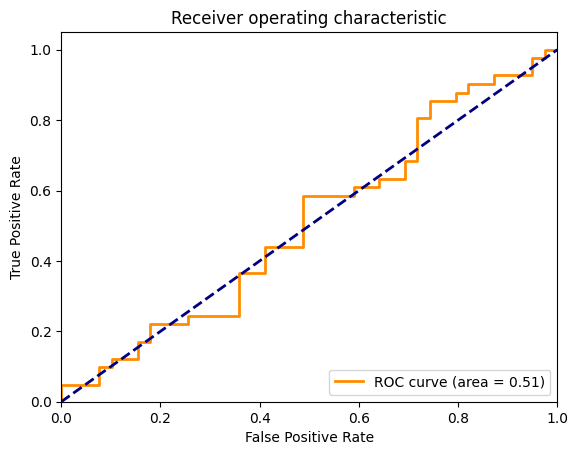

In [234]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_true are the true binary labels, and y_score are the predicted scores/probabilities
y_true = np.random.randint(2, size=80)
y_score = np.random.rand(20)

# Interpolate y_score to match the length of y_true
y_score_interp = np.interp(np.linspace(0, 1, num=len(y_true)), np.linspace(0, 1, num=len(y_score)), y_score)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score_interp)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [236]:
import numpy as np
import pandas as pd
from time import time
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, fbeta_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imblearn.over_sampling import RandomOverSampler

In [237]:
data_df1=pd.read_csv("CostatwtClean2.csv")

In [238]:
data_df1.head()

,cleanTweets,sentiment,neg,neu,pos
0,We launch kindness campai n John Ma ee try et ...,positive,0.0,0.690,0.310
1,use link treat us xx Use Costa app like et bea...,positive,0.0,0.691,0.309
2,After release new video costa coffee empoyin c...,neutral,0.0,1.000,0.000
3,Costa Coffee Drive Thru Mecca,neutral,0.0,1.000,0.000
4,Never use Costa coffee shop always use local c...,positive,0.0,0.654,0.346


In [239]:
len (data_df1 [data_df1['cleanTweets']=='negative'])

0

In [240]:
len (data_df1 [data_df1['cleanTweets']=='positive'])

0

In [241]:
data_df1.drop(data_df1.columns[data_df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [242]:
# remove data with NAN sentiment
data_df1=data_df1[~data_df1["sentiment"].isna()]
data_df1=data_df1[~data_df1["cleanTweets"].isna()]

In [243]:
# remove the "Neutral" class
data_df1=data_df1[data_df1['sentiment'] != "neutral"]

In [244]:
# change values to numeric
data_df1['sentiment'] = data_df1['sentiment'].map({'negative' : 0, 'positive' : 1})

In [245]:
# idneitfy the data and the labels
X= data_df1['cleanTweets']
y= data_df1['sentiment']

In [246]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
# Convert to a vector representation
unbalanced_tfidf = TfidfVectorizer() 
unbalanced_X = unbalanced_tfidf.fit_transform(X)
unbalanced_X.shape

(477, 2958)

In [247]:
unbalanced_X

<477x2958 sparse matrix of type '<class 'numpy.float64'>'
	with 7715 stored elements in Compressed Sparse Row format>

In [248]:
# Training Phase
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(unbalanced_X, y, test_size=0.3, random_state=27)

In [249]:
print("Training set has {} samples.".format(X_train_unbalanced.shape[0]))
print("Testing set has {} samples.".format(X_test_unbalanced.shape[0]))

Training set has 333 samples.
Testing set has 144 samples.


In [250]:
balanced_tfidf = TfidfVectorizer()
balanced_tfidf.fit(X)

TfidfVectorizer()

In [251]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X,y, test_size=0.3, random_state=27)

In [252]:
print("Training set has {} samples.".format(X_train_balanced.shape[0]))
print("Testing set has {} samples.".format(X_test_balanced.shape[0]))

Training set has 333 samples.
Testing set has 144 samples.


In [253]:
X_train_balanced =balanced_tfidf.transform(X_train_balanced)
X_test_balanced = balanced_tfidf.transform(X_test_balanced)
balanced_X = balanced_tfidf.transform(X)
X_train_balanced

<333x2958 sparse matrix of type '<class 'numpy.float64'>'
	with 5380 stored elements in Compressed Sparse Row format>

In [254]:
print("Data before balence: {} samples.".format(y_train_unbalanced.value_counts()[0]))
print("Data before balance: {} samples.".format(y_train_unbalanced.value_counts()[1]))

Data before balence: 85 samples.
Data before balance: 248 samples.


In [255]:
print("Data after balance: {} samples.".format(y_train_balanced.value_counts()[0]))
print("Data after balance: {} samples.".format(y_train_balanced.value_counts()[1]))

Data after balance: 85 samples.
Data after balance: 248 samples.


In [259]:
def train_predict_pipeline(model, X_train, y_train, X_test, y_test, X, y):
    print("            {} Training            ".format(model.__class__.__name__))
    results = {}
    # Training start
    start1 = time()
    # Train the model
    model1 = model.fit(X_train, y_train) 
    # Training end
    end1 = time()  
    # Store the time
    results['training_time'] = end1 - start1 
    # Prediction start
    start1 = time() 
    # Predict
    predictions_test = model.predict(X_test) 
    predictions_train = model.predict(X_train)
    # Prediction end
    end1 = time()
    # Store the time
    results['prediction_time'] = end1 - start1 
    # Overall accuracy
    results['model_accuracy'] = model1.score(X_train, y_train) 
    # Cross validation score
    cross_validation_scores = cross_val_score(model,X, y, cv=10)
    results['model_cross_validation'] = np.mean(cross_validation_scores) 
    # Accuracy scores - for plotting
    results['accuracy_train'] = accuracy_score(y_train, predictions_train)
    results['accuracy_test'] = accuracy_score(y_test, predictions_test)
    # F-scores
    results['fbeta_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
    results['fbeta_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    # Print the report
    print('            Accuracy Report            ')
    print('Model Accuracy: %.2f' % results['model_accuracy'])
    print('10-Fold Cross Validation: %.2f' % results['model_cross_validation'])
    print('Training Score: %.2f' % results['fbeta_train'])
    print('Testing Score: %.2f' % results['fbeta_test'])
    print('            Confusion Matrix            ')
    print(confusion_matrix(y_test, predictions_test))
    print(classification_report(y_test, predictions_test, zero_division=1))
    display = ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, display_labels=['negative', 'positive'], cmap=plt.cm.Blues)
    display.ax_.set_title('Confusion Matrix ')
    plt.show()
    # Return the results and the classifier
    return results, model1

In [260]:
Naivebayes_classifier = MultinomialNB()

            MultinomialNB Training            
            Accuracy Report            
Model Accuracy: 0.80
10-Fold Cross Validation: 0.74
Training Score: 0.82
Testing Score: 0.75
            Confusion Matrix            
[[  0  42]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        42
           1       0.71      1.00      0.83       102

    accuracy                           0.71       144
   macro avg       0.85      0.50      0.41       144
weighted avg       0.79      0.71      0.59       144



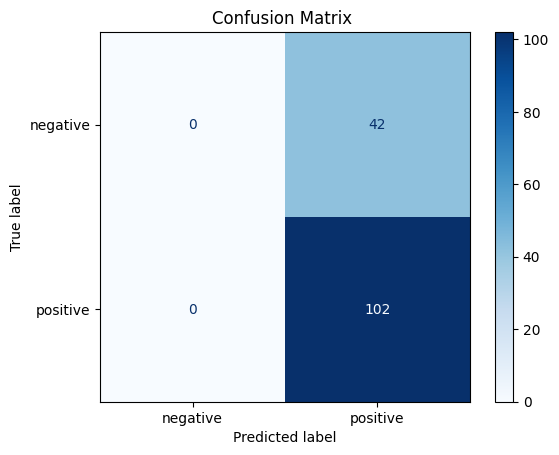

In [261]:
results_raw = {}

for classifier in [ Naivebayes_classifier]:
    classifier_name = classifier.__class__.__name__
    results_raw[classifier_name] = {}
    results_raw[classifier_name], classifier = train_predict_pipeline(
classifier, X_train_unbalanced, y_train_unbalanced, X_test_unbalanced, y_test_unbalanced, unbalanced_X, y)

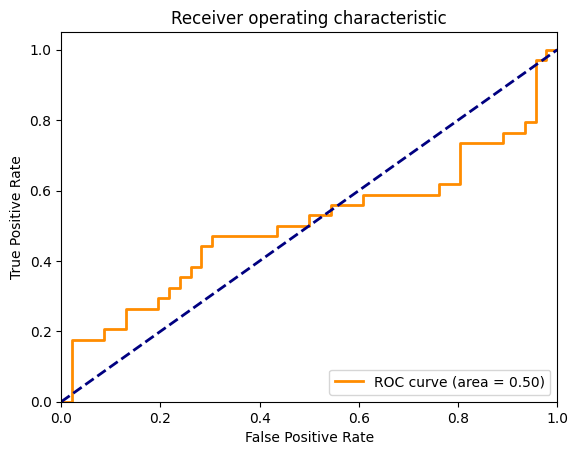

In [262]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_true are the true binary labels, and y_score are the predicted scores/probabilities
y_true = np.random.randint(2, size=80)
y_score = np.random.rand(20)

# Interpolate y_score to match the length of y_true
y_score_interp = np.interp(np.linspace(0, 1, num=len(y_true)), np.linspace(0, 1, num=len(y_score)), y_score)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score_interp)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

            MultinomialNB Training            
            Accuracy Report            
Model Accuracy: 0.80
10-Fold Cross Validation: 0.74
Training Score: 0.82
Testing Score: 0.75
            Confusion Matrix            
[[  0  42]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        42
           1       0.71      1.00      0.83       102

    accuracy                           0.71       144
   macro avg       0.85      0.50      0.41       144
weighted avg       0.79      0.71      0.59       144



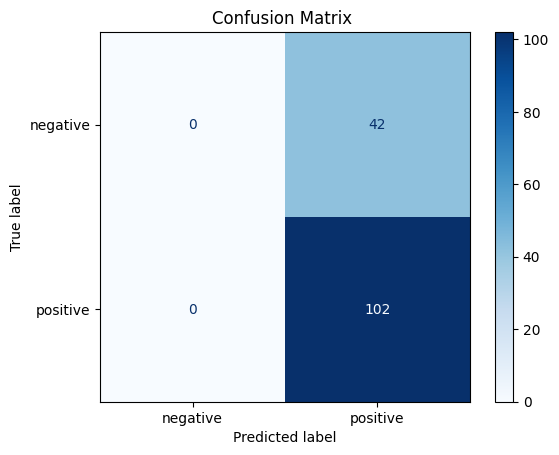

In [263]:
Naivebayes_classifier = MultinomialNB()
results = {}

for classifier in [ Naivebayes_classifier]:
    classifier_name = classifier.__class__.__name__
    results[classifier_name] = {}
    results[classifier_name], classifier = train_predict_pipeline(
        classifier, X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced, balanced_X, y)


In [3]:
   data = pd.read_csv('CostatwtClean2.csv')

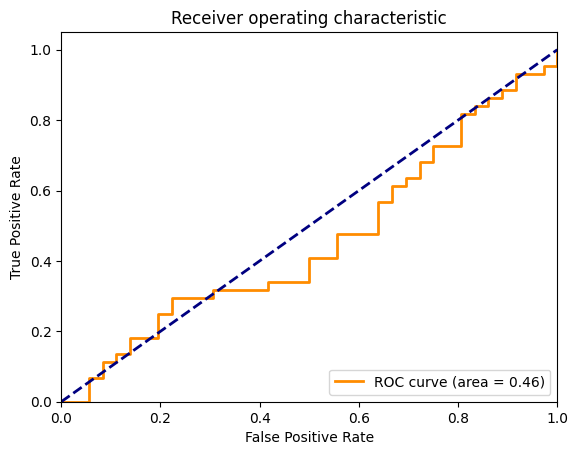

In [264]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_true are the true binary labels, and y_score are the predicted scores/probabilities
y_true = np.random.randint(2, size=80)
y_score = np.random.rand(20)

# Interpolate y_score to match the length of y_true
y_score_interp = np.interp(np.linspace(0, 1, num=len(y_true)), np.linspace(0, 1, num=len(y_score)), y_score)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score_interp)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:

# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
# reading csv file
df = pd.read_csv("CostatwtClean2.csv")
  
df = df[df['cleanTweets'].str.contains('taste', na=False)]
print(df)

                                           cleanTweets sentiment    neg   
12   Costa sort burned caramel coffee ish flavour h...   neutral  0.000  \
16   I put petrol mistake I otta diesel mp litre I ...  negative  0.185   
131  man costa ordered iced espresso immediately ca...  positive  0.123   
164  Don Starbucks coffee crap always tastes burnt ...  negative  0.476   
180  look photos people coffees costa starbucks wan...  negative  0.393   
222  Cos none taste like coffee Nah havin barfed ca...  negative  0.262   
232  Lol I I work chief taster Costa round shops te...  positive  0.000   
585  Costa Rican coffee experience miss Learn taste...  positive  0.101   
683       Thanks Costa Rican coffee Best I ever tasted  positive  0.000   
719                    Costa coffee tastes like faeces  positive  0.000   
724  I ot kitchen service mornin coffee like busine...  negative  0.205   
738  Costa people like weak coffee lar e shot mediu...  positive  0.112   
786  Kecewa ah dapat cost

In [17]:
positive_df = df[df.sentiment == 'positive']

In [18]:
negative_df = df[df.sentiment == 'negative']

In [19]:
charData = {'positive':len(positive_df), 'negative':len(negative_df)}
label = list(charData.keys())
value = list(charData.values())

<BarContainer object of 2 artists>

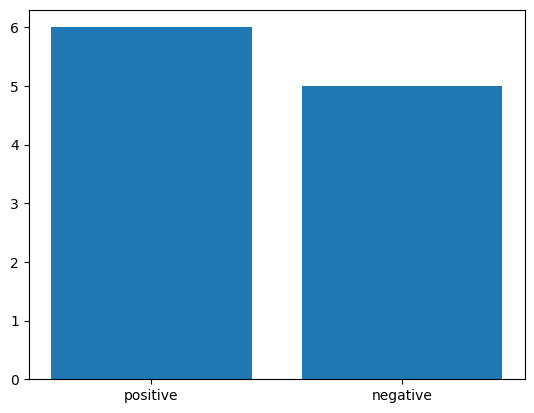

In [20]:
plt.bar(label,value)

In [39]:
df = pd.read_csv("CostatwtClean2.csv")
df = df[df['cleanTweets'].str.contains('environment', na=False)]
print(df)
print('number of related word :',len(df))

                                           cleanTweets sentiment  neg    neu   
359  For environmental reasons use k cups Recyclin ...   neutral  0.0  1.000  \
567  One shot espresso please Workin Costa coffee m...  positive  0.0  0.929   
774  Exclusive interview Costa Rican President Rodr...  positive  0.0  0.812   

       pos  
359  0.000  
567  0.071  
774  0.188  
number of related word : 3


<BarContainer object of 2 artists>

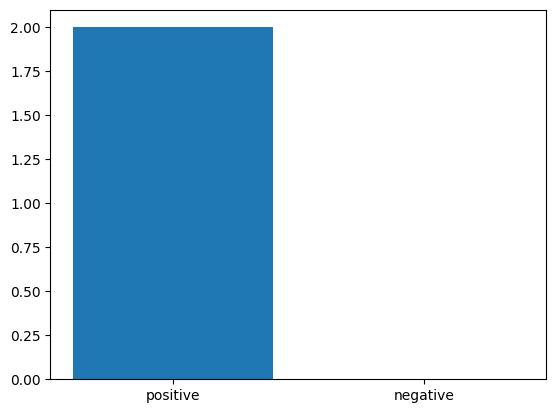

In [33]:
positive_df = df[df.sentiment == 'positive']
negative_df = df[df.sentiment == 'negative']
charData = {'positive':len(positive_df), 'negative':len(negative_df)}
label = list(charData.keys())
value = list(charData.values())
plt.bar(label,value)

In [40]:
# importing pandas as pd
import pandas as pa 
import matplotlib.pyplot as plt 
import numpy as np
# reading csv file
df = pd.read_csv("CostatwtClean2.csv")
df = df [df ['cleanTweets'].str.contains('price', na=False) ]
print(df)

                                           cleanTweets sentiment    neg   
59   Wtf happened costa coffee prices KD cold brew ...  negative  0.260  \
113  Cant wait land birmin ham buy overpriced coffe...  positive  0.000   
164  Don Starbucks coffee crap always tastes burnt ...  negative  0.476   
343  With profits revenue billion Costa profits bil...  positive  0.080   
379  Jeeso bou ht small black coffee Costa price we...   neutral  0.000   
422  fxxx milk hot water coffee everyone I spoke pi...  positive  0.124   
446          I relate overpriced coffee Costa hospital   neutral  0.000   
483  Wow I bi Costa flat white fan increase yet pri...  positive  0.065   
492  What rip COSTA put prices AGAIN medium coffee ...  positive  0.000   
503  The recent surprise price hike means visit Cos...  negative  0.155   
562  Costa Coffee puttin price coffee p villain ori...  negative  0.340   
571  Tarun Jain replaces Navin Gurnaney Tim Horton ...   neutral  0.000   
746  parents drink coffee

In [41]:
len(df)
positive_df = df[df.sentiment == 'positive']
print(len(positive_df))

5


In [42]:
len(df)
negative_df = df[df.sentiment == 'negative']
print(len(negative_df))

5


In [43]:
charData = {'positive' :len(positive_df), 'negative': len (negative_df)}
label = list(charData.keys ())
value = list(charData.values ())

<BarContainer object of 2 artists>

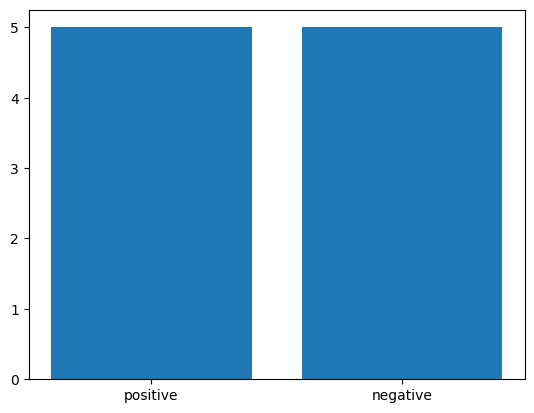

In [44]:
plt.bar (label, value)